<a href="https://colab.research.google.com/github/brahimje/DLProjects/blob/master/Introduction/HorseAndHuman_Training_with_ImageDataGenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training with ImageDataGenerator
In this lab, we will build a train a model on the Horses or Humans dataset. This contains over a thousand images of horses and humans with varying poses and filesizes. You will use the ImageDataGenerator class to prepare this dataset so it can be fed to a convolutional neural network.

In [3]:
# Download dataset horse-or-human.zip
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2022-10-14 14:43:15--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip.3’

horse-or-human.zip. 100%[===================>] 142.65M   277MB/s    in 0.5s    

2022-10-14 14:43:16 (277 MB/s) - ‘horse-or-human.zip.3’ saved [149574867/149574867]



In [4]:
# Download the validation set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2022-10-14 14:43:16--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip.2’

validation-horse-or 100%[===================>]  10.95M  --.-KB/s    in 0.06s   

2022-10-14 14:43:16 (170 MB/s) - ‘validation-horse-or-human.zip.2’ saved [11480187/11480187]



In [5]:
import zipfile

# Unzip with zipfile
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')

# Unzip validation set
local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

In [6]:
import os

# Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

# Directory with validation horse pictures
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')

# Directory with validation human pictures
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

See what the filenames look like in the horses and humans training directories:

In [7]:
train_horse_names = os.listdir(train_horse_dir)
print(f'TRAIN SET HORSES: {train_horse_names[:10]}')

train_human_names = os.listdir(train_human_dir)
print(f'TRAIN SET HUMANS: {train_human_names[:10]}')

validation_horse_names = os.listdir(validation_horse_dir)
print(f'VAL SET HORSES: {validation_horse_names[:10]}')

validation_human_names = os.listdir(validation_human_dir)
print(f'VAL SET HUMANS: {validation_human_names[:10]}')

TRAIN SET HORSES: ['horse48-9.png', 'horse30-2.png', 'horse18-1.png', 'horse30-7.png', 'horse48-1.png', 'horse46-2.png', 'horse31-8.png', 'horse43-4.png', 'horse28-5.png', 'horse35-8.png']
TRAIN SET HUMANS: ['human04-18.png', 'human07-11.png', 'human16-13.png', 'human10-03.png', 'human07-22.png', 'human15-16.png', 'human11-10.png', 'human01-04.png', 'human13-13.png', 'human15-02.png']
VAL SET HORSES: ['horse4-159.png', 'horse4-302.png', 'horse4-541.png', 'horse5-360.png', 'horse6-544.png', 'horse5-519.png', 'horse1-170.png', 'horse1-539.png', 'horse5-032.png', 'horse2-069.png']
VAL SET HUMANS: ['valhuman02-17.png', 'valhuman02-20.png', 'valhuman04-05.png', 'valhuman04-15.png', 'valhuman03-14.png', 'valhuman03-18.png', 'valhuman02-00.png', 'valhuman01-05.png', 'valhuman01-00.png', 'valhuman05-02.png']


In [8]:
# Print the number of horses and human images
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [9]:
# Show some images
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for out graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

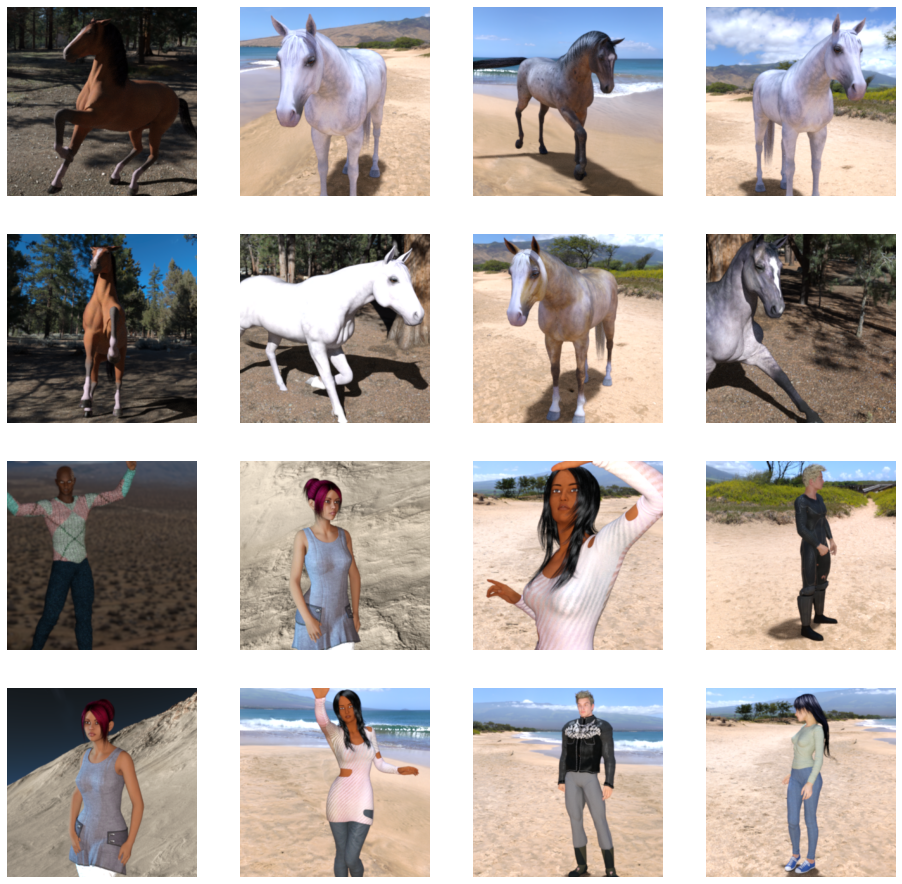

In [10]:
# Display a batch of 8 horse and 8 human pictures.
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                  for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                  for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Building a Small Mode from Scratch

Note that because this is a two-class classification problem, i.e. a binary classification problem, you will end your network with a `sigmoid` activation. **This makes the output value of your network a single scalar between 0 and 1, encoding the probability that the current image is class 1 (as opposed to class 0).**

In [11]:
import tensorflow as tf

In [12]:
model = tf.keras.models.Sequential([
    # The input shape is image of 300x300 with 3 bytes color
    # First convolution
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    # Second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hiden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only one output neuron. It will contain a value from 0-1 where 0 for 'horses' and 1 for 'human'
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

Next, we will train the model with the [`binary_crossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) loss *because it's a binary classification problem*, and the final activation is a `sigmoid`. (For a refresher on loss metrics, see this [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/descending-into-ml/video-lecture).) You will use the `rmsprop` optimizer with a learning rate of `0.001`. During training, you will want to monitor classification accuracy.

**NOTE**: In this case, using the [RMSprop optimization algorithm](https://wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp) is preferable to [stochastic gradient descent](https://developers.google.com/machine-learning/glossary/#SGD) (SGD), because RMSprop automates learning-rate tuning for us. (Other optimizers, such as [Adam](https://wikipedia.org/wiki/Stochastic_gradient_descent#Adam) and [Adagrad](https://developers.google.com/machine-learning/glossary/#AdaGrad), also automatically adapt the learning rate during training, and would work equally well here.)

In [14]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

### Data Preprocessing

Next step is to:
* set up the data generators that will read pictures in the source folders.
* convert them to `float32` tensors.
* and feed them (with their labels) to the model.
You'll have one generator for the training images and one for the validation images. These generators will yield batches of images of size 300x300 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network (i.e. It is uncommon to feed raw pixels into a ConvNet.) In this case, you will preprocess the images by `normalizing` the pixel values to be in the `[0, 1]` range (originally all values are in the `[0, 255]` range).

In Keras, this can be done via the `keras.preprocessing.image.ImageDataGenerator` class using the `rescale` parameter. This `ImageDataGenerator` class allows you to instantiate generators of augmented image batches (and their labels) via `.flow(data, labels)` or `.flow_from_directory(directory)`.

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescalled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    './horse-or-human', # Source dir of train images
    target_size =(300,300), # All images will be resized to 300x300
    batch_size=128,
    class_mode='binary')

# Flow validation images in batches of 128 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './validation-horse-or-human/',  # This is the source directory for validation images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


### Training

Start training for 15 epochs -- this may take a few minutes to run.
Do note the values per epoch.
The `loss` and `accuracy` are great indicators of progress in training. `loss` measures the current model prediction against the known labels, calculating the result. `accuracy`, on the other hand, is the portion of correct guesses. 

In [16]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1,
    validation_data = validation_generator,
    validation_steps=8)

Epoch 1/15
8/8 [==============================] - 13s 899ms/step - loss: 1.3341 - accuracy: 0.5284 - val_loss: 0.6588 - val_accuracy: 0.7109
Epoch 2/15
8/8 [==============================] - 7s 900ms/step - loss: 0.6216 - accuracy: 0.7030 - val_loss: 7.2147 - val_accuracy: 0.5000
Epoch 3/15
8/8 [==============================] - 7s 886ms/step - loss: 1.1049 - accuracy: 0.7419 - val_loss: 0.4964 - val_accuracy: 0.7773
Epoch 4/15
8/8 [==============================] - 7s 868ms/step - loss: 0.3279 - accuracy: 0.8710 - val_loss: 2.2461 - val_accuracy: 0.5586
Epoch 5/15
8/8 [==============================] - 7s 883ms/step - loss: 0.2403 - accuracy: 0.9110 - val_loss: 0.9964 - val_accuracy: 0.7656
Epoch 6/15
8/8 [==============================] - 7s 895ms/step - loss: 0.3063 - accuracy: 0.8821 - val_loss: 0.4544 - val_accuracy: 0.7969
Epoch 7/15
8/8 [==============================] - 7s 903ms/step - loss: 0.2726 - accuracy: 0.9266 - val_loss: 0.6368 - val_accuracy: 0.8008
Epoch 8/15
8/8 [===

### Model Prediction

Now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, upload them, and run them through the model, giving an indication of whether the object is a horse or a human.

**This if you want to test with local images**

In [17]:
import numpy as np
from google.colab import files
from keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
  # Predicting images
  path = '/content/'+fn
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])

  if classes[0]>0.5: print(fn, 'is a human')
  else: print(fn, 'is a horse')

  

Saving horse4.jpg to horse4 (5).jpg
1/1 [==============================] - 0s 263ms/step
[0.9924663]
horse4.jpg is a human


### Visualizing Intermediate Representations

To get a feel for what kind of features your CNN has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the model.

You can pick a random image from the training set, and then generate a figure where **each row is the output of a layer, and each image in the row is a specific filter in that output feature map**. Rerun this cell to generate intermediate representations for a variety of training images.

1/1 [==============================] - 0s 90ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide


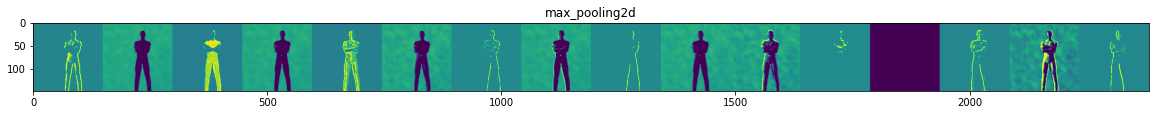

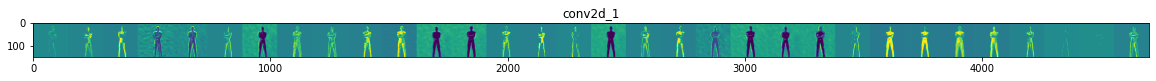

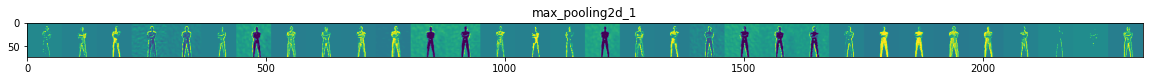

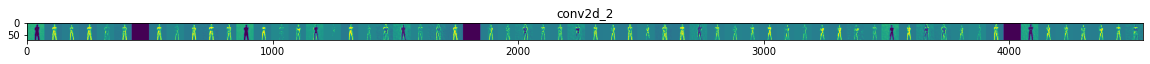

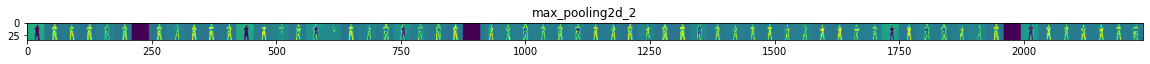

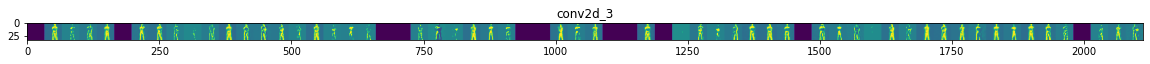

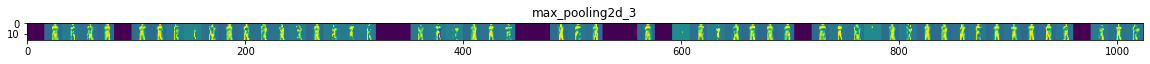

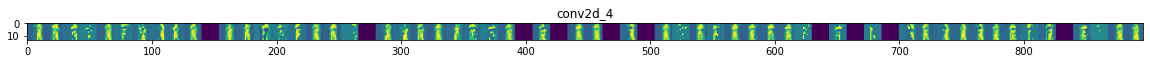

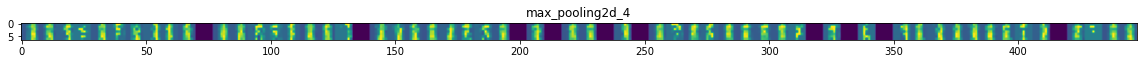

In [18]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300)) # This is a PIL image
x = img_to_array(img) # Numpy array with shape (1, 300, 300, 3)
x = x.reshape((1,) + x.shape)

# Scale by 1/255
x /= 255

# Run the image throuth the netwoek, thus obtaining all
# intermediate representations for this image.

successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have the as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for conv / maxpool layers, not  fully-connected layers
    n_features = feature_map.shape[-1] # number of feature in feature  map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]

    # Title the image in matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')

      # Title each filter into this big horizontal grid
      display_grid[:, i * size: (i+1) * size] = x

    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')


You can see above how the pixels highlighted turn to increasingly abstract and compact representations, especially at the bottom grid. 

The representations downstream start highlighting what the network pays attention to, and they show fewer and fewer features being "activated"; most are set to zero. This is called ***`representation sparsity`*** and is a key feature of deep learning. These representations carry increasingly less information about the original pixels of the image, but increasingly refined information about the class of the image. You can think of a convnet (or a deep network in general) as an information distillation pipeline wherein each layer filters out the most useful features.

## Clean Up

You will continue with a similar exercise in the next lab but before that, run the following cell to terminate the kernel and free memory resources:

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)